# Robotic Systems I (ECE-DK808)

## Electrical and Computer Engineering Department, University of Patras, Greece

**Instructor:** Konstantinos Chatzilygeroudis (costashatz@upatras.gr)

## Lab 5

### Double Integrator System

We want to write a Kalman filter to estimate the state of a `Double Integrator 1D System`:

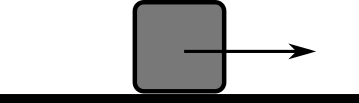

Let's remind ourselves of the equations:

$\boldsymbol{x} = \begin{bmatrix}x\\\dot{x}\end{bmatrix}, \boldsymbol{u} = K\ddot{x}$

$\dot{\boldsymbol{x}} = \begin{bmatrix}\dot{x}\\\frac{\boldsymbol{u}}{K}\end{bmatrix}$

where $K = 1$ is the mass of the object sliding in 1D line. We can write this in a linear form as:

$\boldsymbol{x}_{k+1} = \boldsymbol{A}\boldsymbol{x}_k + \boldsymbol{B}\boldsymbol{u}_k$

where:

$\boldsymbol{A} = \begin{bmatrix}1 & dt\\0 & 1\end{bmatrix}$

$\boldsymbol{B} = \begin{bmatrix}\frac{dt^2}{K}\\\frac{dt}{K}\end{bmatrix}$

In [1]:
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # Plotting

### Kalman Filter

So the first job is to write a generic Kalman filter function that implements the algorithm. We remind that the Kalman Filter assumes linear models:

- **Dynamics:** $\boldsymbol{x}_t = \boldsymbol{A}_t\boldsymbol{x}_{t-1} + \boldsymbol{B}_t\boldsymbol{u}_t + \boldsymbol{\epsilon}^m_t$
- **Observation:** $\boldsymbol{z}_t = \boldsymbol{C}_t\boldsymbol{x}_t + \boldsymbol{\epsilon}^o_t$

where $\boldsymbol{\epsilon}^m_t\sim\mathcal{N}(\boldsymbol{0}, \boldsymbol{R}_t), \boldsymbol{\epsilon}^o_t\sim\mathcal{N}(\boldsymbol{0}, \boldsymbol{Q}_t)$.

Algorithm:
1. Input: $\boldsymbol{\mu}_{t-1}, \boldsymbol{\Sigma}_{t-1}, \boldsymbol{u}_t, \boldsymbol{z}_t$
2. $\overline{\boldsymbol{\mu}}_t = \boldsymbol{A}_t\boldsymbol{\mu}_{t-1}+\boldsymbol{B}_t\boldsymbol{u}_t$
3. $\overline{\boldsymbol{\Sigma}}_t = \boldsymbol{A}_t\boldsymbol{\Sigma}_{t-1}\boldsymbol{A}_t^T + \boldsymbol{R}_t$
4. $\boldsymbol{K}_t = \overline{\boldsymbol{\Sigma}}_t\boldsymbol{C}_t^T\Big(\boldsymbol{C}_t\overline{\boldsymbol{\Sigma}}_t\boldsymbol{C}_t^T + \boldsymbol{Q}_t\Big)^{-1}$
5. $\boldsymbol{\mu}_t = \overline{\boldsymbol{\mu}}_t + \boldsymbol{K}_t(\boldsymbol{z}_t - \boldsymbol{C}_t\overline{\boldsymbol{\mu}}_t)$
6. $\boldsymbol{\Sigma}_t = (\boldsymbol{I} - \boldsymbol{K}_t\boldsymbol{C}_t)\overline{\boldsymbol{\Sigma}}_t$
7. Output: $\boldsymbol{\mu}_t, \boldsymbol{\Sigma}_t$


In [2]:
# Full Kalman filter N-D
def kalman_step(mu, Sig, u, z, A, B, C, R, Q):
    ### TO-DO: Implement the Kalman Filter algorithm
    ### ANSWER: Insert code here
    mt_bar = A @ mu + B @ u
    Sigt_bar = A @ Sig @ A.T + R
    Kt = Sigt_bar @ C.T @ np.linalg.inv(C @ Sigt_bar @ C.T + Q)
    mt = mt_bar + Kt @ (z - C @ mt_bar)
    Sigt = (np.eye(len(mu)) - Kt @ C) @ Sigt_bar

    mu_new = mt
    Sig_new = Sigt
    ### END of ANSWER
    return mu_new, Sig_new

In [3]:
m = np.zeros((3, 1))
s = np.ones((3, 3)) * 0.1

u = np.zeros((3, 1))
A = np.ones((3, 3))
B = np.ones((3, 3))

C = np.array([[1., 0., 0.], [0., 0., 1.], [0., 1., 0.]])
z = np.ones((3, 1))

R = np.eye(3)
Q = np.eye(3) * 0.

mn, sn = kalman_step(m, s, u, z, A, B, C, R, Q)

assert(np.isclose(mn, np.ones((3, 1))).all())
assert(np.isclose(sn, np.zeros((3, 3))).all())

R = np.eye(3) * 0.1
Q = np.eye(3)
mn, sn = kalman_step(m, s, u, z, A, B, C, R, Q)

res = np.array([[0.73684211, 0.73684211, 0.73684211]])
sig = np.array([[0.3062201, 0.215311, 0.215311], [0.215311, 0.3062201, 0.215311], [0.215311, 0.215311, 0.3062201]])

assert(np.isclose(mn, res, rtol=1e-3).all())
assert(np.isclose(sn, sig, rtol=1e-3).all())

### Motion Model

OK. Let's implement the motion model (the `A` and `B` matrices) and assume a diagonal Gaussian of 0.05 magnitude as motion noise.

In [4]:
dt = 0.05

### TO-DO: Create the matrices A, B and R (numpy arrays). A and B are the dynamics matrices, and R is the diagonal Gaussian noise.
### ANSWER: Insert code here
K = 1
A = np.array([[1, dt],
              [0,  1]])
B = np.array([[dt**2 / K],
              [   dt / K]])
R = 0.05 * np.eye(2)
### END of ANSWER

In [ ]:
x = np.zeros((2, 1))
u = np.ones((1, 1))

assert(np.isclose(A@x, np.zeros((2, 1)), rtol=1e-3).all())
assert(np.isclose(B@u, np.array([[0.0025], [0.05]]), rtol=1e-3).all())


### Observation Model

Now we need to choose an observation model! Let's assume that we can *see* the whole state but with diagonal Gaussian noise of 0.2 magnitude.

In [ ]:
### TO-DO: Create the matrices C and Q (numpy arrays). C is the observation model/matrix, and Q is the diagonal Gaussian noise.
### ANSWER: Insert code here
C = np.eye(2)
Q = 0.2 * np.eye(2)
### END of ANSWER

u = np.array([[1.]]) ### TO-DO: Try changing this to see if the control affect the estimation!

In [ ]:
x = np.random.rand(2, 1)

assert(np.isclose(C@x, x, rtol=1e-3).all())
assert(Q.shape[0] == 2)
assert(Q.shape[1] == 2)
assert(np.isclose(Q.sum(), 0.4))


In [ ]:
def step(x, u):
    ### TO-DO: Write the forward simulation step! x' = f(x, u). We use the linear model since our system is linear. Return x'
    ### ANSWER: Insert code here
    return A @ x + B @ u
    ### END of ANSWER

def observe(x):
    ### TO-DO: Implement the measurement acquisition! Here we need to "simulate" a sensor. Store the result in a variable named 'z' (a numpy array). Remember to add noise using `np.random.multivariate_normal`.
    ### ANSWER: Insert code here
    mean = [0., 0.]
    epsilon0 = np.random.multivariate_normal(mean, Q)
    z = C @ x + epsilon0.reshape((2,1))
    ### END of ANSWER
    return z

In [ ]:
xr = np.zeros((2, 1))
ur = np.ones((1, 1))

assert(np.isclose(step(xr, ur), np.array([[0.0025], [0.05]]), rtol=1e-3).all())

np.random.seed(1)
assert(np.isclose(observe(xr), np.array([[0.72642933], [-0.27358579]]), rtol=1e-3).all())

In [ ]:
# OK! Now we can test it!

# Let's do a simulation!
x = np.zeros((2, 1)) # We start at (0,0)

K = 200 # K steps

states = [np.copy(x)]
estimation = [(np.copy(x), np.eye(2) * 0.001)] # We start with a small uncertainty!

for k in range(K):
    # Let's move the simulator forward
    x = step(x, u)
    states.append(np.copy(x))

    # Let's get the measurement!
    z = observe(x)

    # Let's do a Kalman step!
    mu, sig = estimation[-1]
    mu_new, sig_new = kalman_step(mu, sig, u, z, A, B, C, R, Q)
    estimation.append((np.copy(mu_new), np.copy(sig_new)))

In [ ]:
# Let's plot!
times = np.arange(len(states))

plt.plot(times, [st[0] for st in states], label='X-Actual')
plt.plot(times, [st[0][0, 0] for st in estimation], label='X-Estimation')

plt.plot(times, [st[1] for st in states], label='Vel-Actual')
plt.plot(times, [st[0][1, 0] for st in estimation], label='Vel-Estimation')

plt.legend()

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 40
X = np.linspace(-6, 6, N)
Y = np.linspace(-6, 6, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
idx = -1
mu = estimation[idx][0][:2, 0]
Sigma = estimation[idx][1][:2, :2]

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos."""

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# plot using subplots
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1,projection='3d')

ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
ax1.view_init(55,-70)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')

ax2 = fig.add_subplot(2,1,2,projection='3d')
ax2.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.viridis)
ax2.view_init(90, 270)

ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')

plt.show()